### 2.5


1 заданние 

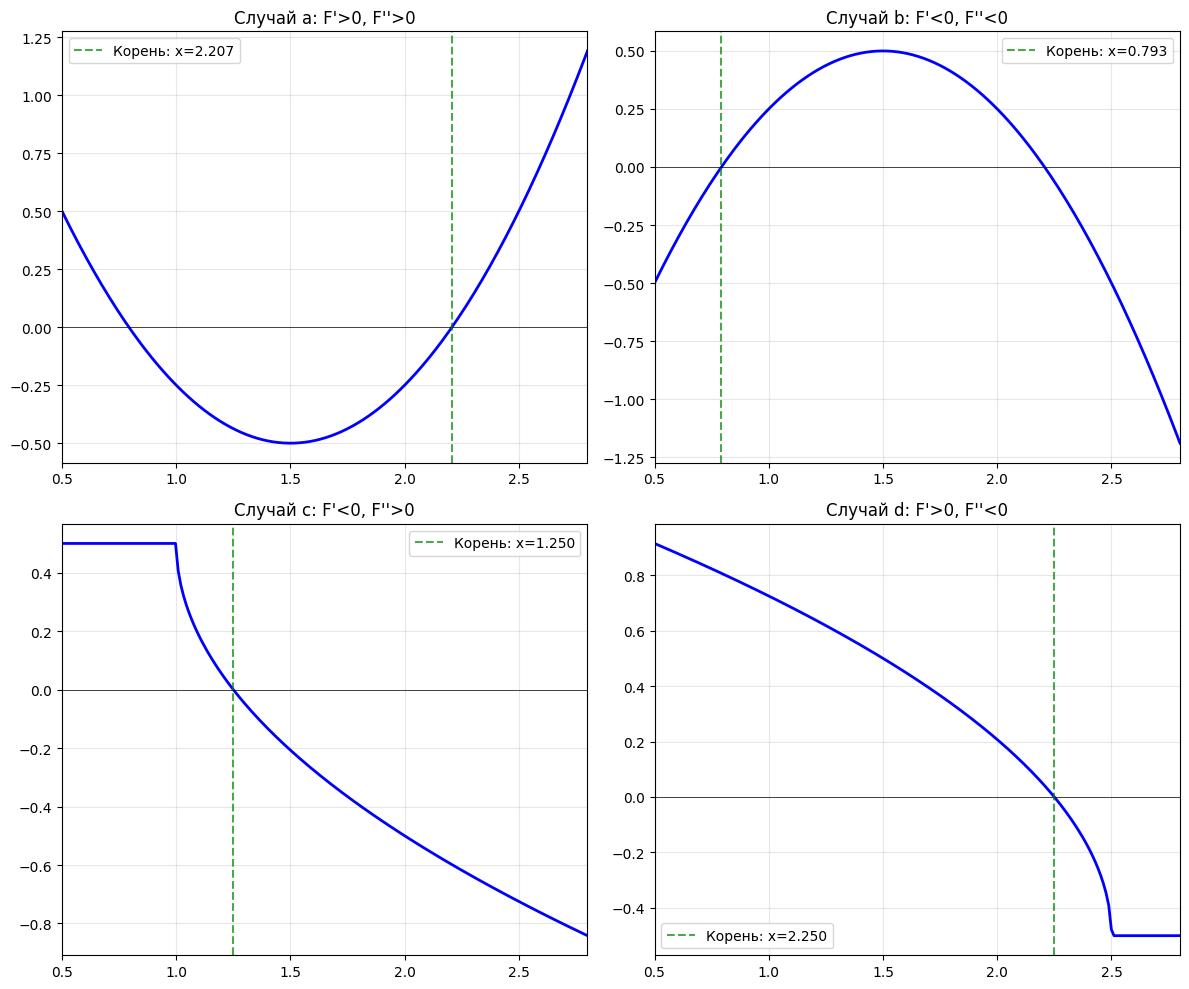

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 4 разных случая (значения не изменены)
funcs = [
    lambda x: (x-1.5)**2 - 0.5,           
    lambda x: -(x-1.5)**2 + 0.5,           
    lambda x: -np.sqrt(np.maximum(x-1, 0)) + 0.5,  # защита от отрицательных значений
    lambda x: np.sqrt(np.maximum(2.5-x, 0)) - 0.5   # защита от отрицательных значений
]

titles = ["F'>0, F''>0", "F'<0, F''<0", "F'<0, F''>0", "F'>0, F''<0"]
roots = [1.5+np.sqrt(0.5), 1.5-np.sqrt(0.5), 1.25, 2.25]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (f, title, root) in enumerate(zip(funcs, titles, roots)):
    x = np.linspace(0.5, 2.8, 200)
    y = f(x)
    
    axes[i].plot(x, y, 'b-', linewidth=2)
    axes[i].axhline(0, color='black', linewidth=0.5)
    axes[i].axvline(root, color='g', linestyle='--', alpha=0.7, label=f'Корень: x={root:.3f}')
    axes[i].set_title(f'Случай {chr(97+i)}: {title}')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    axes[i].set_xlim([0.5, 2.8])  # фиксируем пределы

plt.tight_layout()
plt.show()

2 задание

In [ ]:
def combined_method_simple(a, b, eps=1e-6):
    """
    Комбинированный метод хорд и касательных
    Вывод полностью сохранен как в оригинале
    """
    # функция и производные
    def F(x):
        return x**3 + 3*x**2 - 24*x + 1
    
    def Fp(x):
        return 3*x**2 + 6*x - 24
    
    def Fpp(x):
        return 6*x + 6
    
    # неподвижный конец c
    if F(a) * Fpp(a) > 0:
        c, x_chord, x_tan = a, b, a
    else:
        c, x_chord, x_tan = b, a, b
    
    print(f"Начальные: c={c}, хорды={x_chord}, касательные={x_tan}")
    
    for i in range(1, 20):
        # метод хорд
        a_new = (c * F(x_chord) - x_chord * F(c)) / (F(x_chord) - F(c))
        
        # метод касательных
        b_new = x_tan - F(x_tan) / Fp(x_tan)
        
        diff = abs(a_new - b_new)
        print(f"i={i}: [{a_new:.6f}, {b_new:.6f}] разница={diff:.2e}")
        
        if diff < eps:
            root = (a_new + b_new) / 2
            print(f"\nКорень: {root:.8f}")
            print(f"Проверка: F(root)={F(root):.2e}")
            return root
        
        x_chord, x_tan = a_new, b_new
    
    return (x_chord + x_tan) / 2

# Вызов функции
combined_method_simple(0, 1)


Начальные: c=0, хорды=1, касательные=0
i=1: [0.050000, 0.041667] разница=8.33e-03
i=2: [0.041933, 0.041889] разница=4.41e-05
i=3: [0.041889, 0.041889] разница=2.38e-07

Корень: 0.04188919
Проверка: F(root)=-2.83e-06


0.04188918518497596